In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
 from sklearn.datasets import make_regression

In [4]:
# Read the csv file into a pandas DataFrame
abnb = pd.read_csv('clean_listings.csv')
abnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,2019-11-04,0.39,1,1
1,1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,2019-11-22,4.67,1,1
2,2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,78,2019-10-13,0.60,1,19
3,3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,49,2017-10-05,0.38,1,365
4,4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,454,2019-11-21,3.52,1,242


In [5]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50583 entries, 0 to 50582
Data columns (total 17 columns):
Unnamed: 0                        50583 non-null int64
id                                50583 non-null int64
name                              50566 non-null object
host_id                           50583 non-null int64
host_name                         50020 non-null object
neighbourhood_group               50583 non-null object
neighbourhood                     50583 non-null object
latitude                          50583 non-null float64
longitude                         50583 non-null float64
room_type                         50583 non-null object
price                             50583 non-null int64
minimum_nights                    50583 non-null int64
number_of_reviews                 50583 non-null int64
last_review                       40364 non-null object
reviews_per_month                 40364 non-null float64
calculated_host_listings_count    50583 non-null int64

In [6]:
abnb.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50583.000000,5.058300e+04,5.058300e+04,50583.000000,50583.000000,50583.000000,50583.000000,50583.000000,40364.000000,50583.000000,50583.000000
mean,25296.529644,2.137178e+07,7.893029e+07,40.728748,-73.950763,158.221814,7.531878,24.808888,1.405667,7.332147,112.771998
std,14606.939240,1.242899e+07,9.095542e+07,0.055010,0.047610,348.133242,22.457003,47.318557,1.695511,32.762568,135.890353
min,0.000000,2.595000e+03,2.438000e+03,40.499790,-74.247870,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12645.500000,1.009678e+07,8.924880e+06,40.689545,-73.982930,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,25301.000000,2.154779e+07,3.570849e+07,40.722880,-73.955050,105.000000,3.000000,6.000000,0.740000,1.000000,42.000000
75%,37946.500000,3.271741e+07,1.293330e+08,40.763040,-73.934225,175.000000,5.000000,25.000000,2.110000,2.000000,225.000000
max,50598.000000,4.058402e+07,3.143682e+08,40.916860,-73.712990,10000.000000,1250.000000,675.000000,52.630000,310.000000,365.000000


In [7]:
abnb_df = pd.DataFrame(abnb)

In [8]:
abnb_df = abnb_df.sort_values(by=['price'])
abnb_df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25915,25925,21869057,Spacious 2-bedroom Apt in Heart of Greenpoint,11967922,Vishanti & Jeremy,Brooklyn,Greenpoint,40.72421,-73.95364,Entire home/apt,10,1,124,2019-11-25,5.02,1,50
20724,20724,17979764,Jen Apt,84497333,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,2017-04-15,0.06,1,0
30224,30234,25839759,Gigantic Sunny Room in Park Slope-Private Back...,167570251,Rachel,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,2018-10-28,0.77,1,7
28999,29009,24412104,Cozy feel at home studio,91034542,Maureen,Manhattan,Kips Bay,40.74408,-73.97803,Private room,10,5,53,2019-11-17,2.69,1,30
41629,41639,35642891,Beautiful room in Bushwick,268138154,Julio,Brooklyn,Bushwick,40.69640,-73.91898,Private room,10,1,2,2019-06-18,0.35,1,0


In [9]:
abnb_df.tail()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48536,48552,39797068,"OYO Times Square, Superior City View Queen",304077493,OYO Times Square,Manhattan,Theater District,40.75820,-73.98456,Private room,10000,1,0,NaN,NaN,9,337
48537,48553,39797117,"OYO Times Square, Superior King",304077493,OYO Times Square,Manhattan,Theater District,40.75808,-73.98479,Private room,10000,1,0,NaN,NaN,9,337
48538,48554,39797190,"OYO Times Square, Deluxe King",304077493,OYO Times Square,Manhattan,Theater District,40.75968,-73.98403,Private room,10000,1,0,NaN,NaN,9,338
43546,43556,37122162,The Ridge Hotel - Full Standard Room,266755066,The Ridge Hotel,Manhattan,Lower East Side,40.72212,-73.98994,Private room,10000,1,0,NaN,NaN,5,332
43548,43558,37122502,The Ridge Hotel - Queen Room,266755066,The Ridge Hotel,Manhattan,Lower East Side,40.72335,-73.99021,Private room,10000,1,2,2019-11-27,2.0,5,353


In [35]:
abnb_df_corr = abnb_df.corr()
abnb_df_corr

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Unnamed: 0,1.000000,0.998982,0.601593,-0.006513,0.105377,0.034164,-0.000018,-0.313368,0.305078,0.114399,0.141919
id,0.998982,1.000000,0.600382,-0.007226,0.106543,0.032524,0.000203,-0.312672,0.303970,0.116331,0.140517
host_id,0.601593,0.600382,1.000000,0.022099,0.139028,0.048836,0.007501,-0.140891,0.302098,0.110705,0.235601
latitude,-0.006513,-0.007226,0.022099,1.000000,0.077465,0.029677,0.028080,-0.016329,-0.017211,0.023939,-0.005635
longitude,0.105377,0.106543,0.139028,0.077465,1.000000,-0.112694,-0.054913,0.058805,0.158536,-0.109466,0.083586
price,0.034164,0.032524,0.048836,0.029677,-0.112694,1.000000,0.028448,-0.041879,-0.024479,0.024014,0.064661
minimum_nights,-0.000018,0.000203,0.007501,0.028080,-0.054913,0.028448,1.000000,-0.087711,-0.126797,0.121800,0.149217
number_of_reviews,-0.313368,-0.312672,-0.140891,-0.016329,0.058805,-0.041879,-0.087711,1.000000,0.558214,-0.075058,0.118009
reviews_per_month,0.305078,0.303970,0.302098,-0.017211,0.158536,-0.024479,-0.126797,0.558214,1.000000,-0.044544,0.177456
calculated_host_listings_count,0.114399,0.116331,0.110705,0.023939,-0.109466,0.024014,0.121800,-0.075058,-0.044544,1.000000,0.224970


In [11]:
abnb_nrows = len(abnb_df.index)

abnb_df_50 = abnb_df.iloc[round(abnb_nrows*.25):round(abnb_nrows*.75)]
abnb_df_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25291 entries, 39358 to 45598
Data columns (total 17 columns):
Unnamed: 0                        25291 non-null int64
id                                25291 non-null int64
name                              25285 non-null object
host_id                           25291 non-null int64
host_name                         25002 non-null object
neighbourhood_group               25291 non-null object
neighbourhood                     25291 non-null object
latitude                          25291 non-null float64
longitude                         25291 non-null float64
room_type                         25291 non-null object
price                             25291 non-null int64
minimum_nights                    25291 non-null int64
number_of_reviews                 25291 non-null int64
last_review                       20889 non-null object
reviews_per_month                 20889 non-null float64
calculated_host_listings_count    25291 non-null i

In [29]:
abnb_df_50_describe = abnb_df_50.describe()
abnb_df_50_describe

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25291.000000,2.529100e+04,2.529100e+04,25291.000000,25291.000000,25291.000000,25291.000000,25291.000000,20889.000000,25291.000000,25291.000000
mean,24088.617413,2.034275e+07,7.078560e+07,40.729316,-73.952064,112.651299,6.766399,27.893796,1.411428,4.607014,103.421968
std,14573.244492,1.242375e+07,8.673415e+07,0.055307,0.045041,30.520673,20.992256,50.424282,1.697630,22.705827,131.345021
min,1.000000,3.831000e+03,2.438000e+03,40.499790,-74.247870,69.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,11280.000000,9.350298e+06,7.270688e+06,40.688755,-73.981900,85.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,23508.000000,2.023574e+07,2.987144e+07,40.722400,-73.955040,105.000000,2.000000,7.000000,0.720000,1.000000,29.000000
75%,36620.500000,3.135474e+07,1.072968e+08,40.765140,-73.937875,140.000000,5.000000,29.000000,2.190000,2.000000,179.000000
max,50598.000000,4.058402e+07,3.143147e+08,40.916860,-73.725400,175.000000,1125.000000,580.000000,52.630000,310.000000,365.000000


In [30]:
abnb_df_50_corr = abnb_df_50.corr()
abnb_df_50_corr

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Unnamed: 0,1.000000,0.999062,0.582380,-0.015402,0.120362,-0.023223,-0.021870,-0.318349,0.298520,0.087707,0.100876
id,0.999062,1.000000,0.581009,-0.016454,0.120825,-0.023768,-0.022557,-0.317582,0.297914,0.086037,0.098671
host_id,0.582380,0.581009,1.000000,0.019970,0.148922,-0.042645,-0.015468,-0.138886,0.290506,0.112627,0.217025
latitude,-0.015402,-0.016454,0.019970,1.000000,0.091071,0.005103,0.031944,-0.025709,-0.038441,0.005301,-0.019392
longitude,0.120362,0.120825,0.148922,0.091071,1.000000,-0.163412,-0.057596,0.032874,0.152946,-0.104821,0.115902
price,-0.023223,-0.023768,-0.042645,0.005103,-0.163412,1.000000,0.045548,-0.016281,-0.047988,0.113622,0.029867
minimum_nights,-0.021870,-0.022557,-0.015468,0.031944,-0.057596,0.045548,1.000000,-0.077642,-0.123627,0.072312,0.129742
number_of_reviews,-0.318349,-0.317582,-0.138886,-0.025709,0.032874,-0.016281,-0.077642,1.000000,0.565010,-0.059874,0.153112
reviews_per_month,0.298520,0.297914,0.290506,-0.038441,0.152946,-0.047988,-0.123627,0.565010,1.000000,-0.046108,0.186852
calculated_host_listings_count,0.087707,0.086037,0.112627,0.005301,-0.104821,0.113622,0.072312,-0.059874,-0.046108,1.000000,0.216645


In [14]:
abnb_df_80 = abnb_df.iloc[round(abnb_nrows*.1):round(abnb_nrows*.9)]
abnb_df_80.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40467 entries, 21199 to 4316
Data columns (total 17 columns):
Unnamed: 0                        40467 non-null int64
id                                40467 non-null int64
name                              40454 non-null object
host_id                           40467 non-null int64
host_name                         39993 non-null object
neighbourhood_group               40467 non-null object
neighbourhood                     40467 non-null object
latitude                          40467 non-null float64
longitude                         40467 non-null float64
room_type                         40467 non-null object
price                             40467 non-null int64
minimum_nights                    40467 non-null int64
number_of_reviews                 40467 non-null int64
last_review                       32908 non-null object
reviews_per_month                 32908 non-null float64
calculated_host_listings_count    40467 non-null in

In [28]:
abnb_df_80_describe = abnb_df_80.describe()
abnb_df_80_describe

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40467.000000,4.046700e+04,4.046700e+04,40467.000000,40467.000000,40467.000000,40467.000000,40467.000000,32908.000000,40467.000000,40467.000000
mean,24657.875800,2.083144e+07,7.423009e+07,40.729227,-73.951446,121.058121,7.061828,26.369931,1.410835,6.832184,107.858205
std,14565.338709,1.240717e+07,8.849803e+07,0.054823,0.046178,55.419996,21.856883,48.858841,1.693149,32.016433,133.775767
min,0.000000,2.595000e+03,2.438000e+03,40.499790,-74.247870,49.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12011.500000,9.778719e+06,7.981240e+06,40.689675,-73.982360,75.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24318.000000,2.089598e+07,3.222005e+07,40.722720,-73.955030,105.000000,2.000000,6.000000,0.730000,1.000000,33.000000
75%,37159.000000,3.196366e+07,1.167329e+08,40.763920,-73.936560,155.000000,5.000000,27.000000,2.140000,2.000000,194.500000
max,50598.000000,4.058402e+07,3.143647e+08,40.916860,-73.712990,265.000000,1250.000000,638.000000,52.630000,310.000000,365.000000


In [31]:
abnb_df_80_corr = abnb_df_80.corr()
abnb_df_80_corr

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Unnamed: 0,1.000000,0.999021,0.590400,-0.010194,0.114072,-0.011690,-0.012402,-0.315442,0.302284,0.112481,0.122590
id,0.999021,1.000000,0.589053,-0.010952,0.114813,-0.012313,-0.012629,-0.314791,0.301214,0.113672,0.120971
host_id,0.590400,0.589053,1.000000,0.019745,0.150795,-0.038531,-0.008575,-0.135910,0.301878,0.119997,0.226916
latitude,-0.010194,-0.010952,0.019745,1.000000,0.075873,0.043856,0.039991,-0.020934,-0.027790,0.021652,-0.010274
longitude,0.114072,0.114813,0.150795,0.075873,1.000000,-0.270210,-0.066469,0.051446,0.165995,-0.120629,0.097774
price,-0.011690,-0.012313,-0.038531,0.043856,-0.270210,1.000000,0.048024,-0.041855,-0.067745,0.175546,0.053042
minimum_nights,-0.012402,-0.012629,-0.008575,0.039991,-0.066469,0.048024,1.000000,-0.082991,-0.119787,0.111029,0.143095
number_of_reviews,-0.315442,-0.314791,-0.135910,-0.020934,0.051446,-0.041855,-0.082991,1.000000,0.561471,-0.073030,0.136016
reviews_per_month,0.302284,0.301214,0.301878,-0.027790,0.165995,-0.067745,-0.119787,0.561471,1.000000,-0.044438,0.187983
calculated_host_listings_count,0.112481,0.113672,0.119997,0.021652,-0.120629,0.175546,0.111029,-0.073030,-0.044438,1.000000,0.239389


In [17]:
abnb_df_90 = abnb_df.iloc[round(abnb_nrows*.05):round(abnb_nrows*.95)]
abnb_df_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45525 entries, 32076 to 18269
Data columns (total 17 columns):
Unnamed: 0                        45525 non-null int64
id                                45525 non-null int64
name                              45509 non-null object
host_id                           45525 non-null int64
host_name                         45014 non-null object
neighbourhood_group               45525 non-null object
neighbourhood                     45525 non-null object
latitude                          45525 non-null float64
longitude                         45525 non-null float64
room_type                         45525 non-null object
price                             45525 non-null int64
minimum_nights                    45525 non-null int64
number_of_reviews                 45525 non-null int64
last_review                       36798 non-null object
reviews_per_month                 36798 non-null float64
calculated_host_listings_count    45525 non-null i

In [27]:
abnb_df_90_describe = abnb_df_90.describe()
abnb_df_90_describe

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45525.000000,4.552500e+04,4.552500e+04,45525.000000,45525.000000,45525.000000,45525.000000,45525.000000,36798.000000,45525.000000,45525.000000
mean,24940.929248,2.107209e+07,7.603238e+07,40.729028,-73.951078,127.001823,7.276156,25.796991,1.414226,7.304206,109.552202
std,14572.440131,1.240783e+07,8.934109e+07,0.054781,0.046847,70.267066,21.867415,48.476792,1.705181,33.412752,134.452458
min,0.000000,2.595000e+03,2.438000e+03,40.499790,-74.247870,40.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12290.000000,9.915508e+06,8.343891e+06,40.689700,-73.982630,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24743.000000,2.119541e+07,3.368719e+07,40.722560,-73.954990,105.000000,2.000000,6.000000,0.740000,1.000000,36.000000
75%,37484.000000,3.231064e+07,1.207625e+08,40.763460,-73.935410,167.000000,5.000000,27.000000,2.140000,2.000000,209.000000
max,50598.000000,4.058402e+07,3.143682e+08,40.916860,-73.712990,350.000000,1250.000000,675.000000,52.630000,310.000000,365.000000


In [48]:
abnb_df_90_corr = abnb_df_90.corr()
corr = abnb_df_90.loc[:,abnb_df_90.dtypes == 'float64'].corr()
abnb_df_90_corr

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
Unnamed: 0,1.000000,0.999004,0.593741,-0.006329,0.107516,0.011782,-0.004464,-0.313062,0.303957,0.117512,0.129125
id,0.999004,1.000000,0.592544,-0.007132,0.108378,0.010733,-0.004461,-0.312398,0.302947,0.119143,0.127659
host_id,0.593741,0.592544,1.000000,0.024281,0.147393,-0.014033,0.000605,-0.136194,0.304928,0.117352,0.231229
latitude,-0.006329,-0.007132,0.024281,1.000000,0.076624,0.057544,0.033018,-0.017008,-0.020652,0.022691,-0.003465
longitude,0.107516,0.108378,0.147393,0.076624,1.000000,-0.288807,-0.064618,0.057763,0.164361,-0.119560,0.093401
price,0.011782,0.010733,-0.014033,0.057544,-0.288807,1.000000,0.034641,-0.046004,-0.046225,0.160648,0.071160
minimum_nights,-0.004464,-0.004461,0.000605,0.033018,-0.064618,0.034641,1.000000,-0.086023,-0.122764,0.120836,0.148736
number_of_reviews,-0.313062,-0.312398,-0.136194,-0.017008,0.057763,-0.046004,-0.086023,1.000000,0.562395,-0.075513,0.129657
reviews_per_month,0.303957,0.302947,0.304928,-0.020652,0.164361,-0.046225,-0.122764,0.562395,1.000000,-0.044048,0.186421
calculated_host_listings_count,0.117512,0.119143,0.117352,0.022691,-0.119560,0.160648,0.120836,-0.075513,-0.044048,1.000000,0.233845


In [20]:
abnb_df_90.to_csv(r'abnb_df_90.csv')

In [21]:
abnb_df_80.to_csv(r'abnb_df_80.csv')

In [22]:
abnb_df_50.to_csv(r'abnb_df_50.csv')

In [40]:
# Create an completely empty Dataframe without any column names, indices or data
abnb_df_corr_comparison = pd.DataFrame(columns=['100_percent', '90_percent', '80_percent','50_percent'],
                                       index=['Unnamed: 0', 'id', 'host_id', 'latitude', 'longitude',
                                             'price', 'minimum_nights', 'number_of_reviews',
                                              'reviews_per_month','calculated_host_listings_count',
                                             'availability_365'])
abnb_df_corr_comparison['100_percent'] = abnb_df_corr.price
abnb_df_corr_comparison['90_percent'] = abnb_df_90_corr.price
abnb_df_corr_comparison['80_percent'] = abnb_df_80_corr.price
abnb_df_corr_comparison['50_percent'] = abnb_df_50_corr.price
abnb_df_corr_comparison

,100_percent,90_percent,80_percent,50_percent
Unnamed: 0,0.034164,0.011782,-0.011690,-0.023223
id,0.032524,0.010733,-0.012313,-0.023768
host_id,0.048836,-0.014033,-0.038531,-0.042645
latitude,0.029677,0.057544,0.043856,0.005103
longitude,-0.112694,-0.288807,-0.270210,-0.163412
price,1.000000,1.000000,1.000000,1.000000
minimum_nights,0.028448,0.034641,0.048024,0.045548
number_of_reviews,-0.041879,-0.046004,-0.041855,-0.016281
reviews_per_month,-0.024479,-0.046225,-0.067745,-0.047988
calculated_host_listings_count,0.024014,0.160648,0.175546,0.113622


In [44]:
abnb_df_corr_comparison = abnb_df_corr_comparison.drop(['price'])
abnb_df_corr_comparison

,100_percent,90_percent,80_percent,50_percent
Unnamed: 0,0.034164,0.011782,-0.011690,-0.023223
id,0.032524,0.010733,-0.012313,-0.023768
host_id,0.048836,-0.014033,-0.038531,-0.042645
latitude,0.029677,0.057544,0.043856,0.005103
longitude,-0.112694,-0.288807,-0.270210,-0.163412
minimum_nights,0.028448,0.034641,0.048024,0.045548
number_of_reviews,-0.041879,-0.046004,-0.041855,-0.016281
reviews_per_month,-0.024479,-0.046225,-0.067745,-0.047988
calculated_host_listings_count,0.024014,0.160648,0.175546,0.113622
availability_365,0.064661,0.071160,0.053042,0.029867


In [41]:
abnb_df_corr_comparison.to_csv(r'abnb_df_corr_comparison.csv')

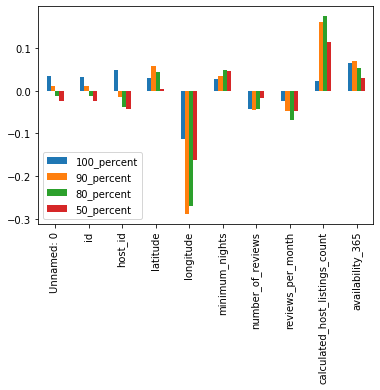

In [61]:

ax = abnb_df_corr_comparison.plot.bar()
ax.figure.savefig('price_corr_diff_percent_sample.png')

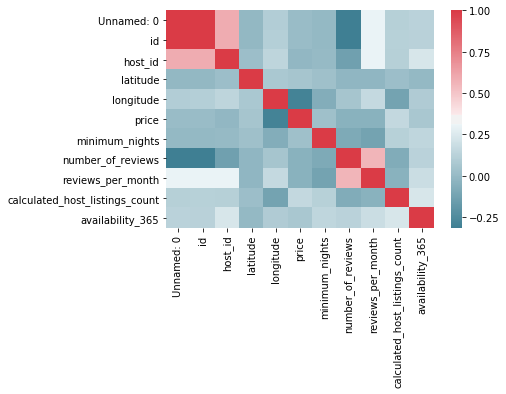

In [62]:
import seaborn as sns

ax2 = sns.heatmap(abnb_df_90_corr, xticklabels=abnb_df_90_corr.columns,
            yticklabels=abnb_df_90_corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))

ax2.figure.savefig('price_corr90_heat_map.png')

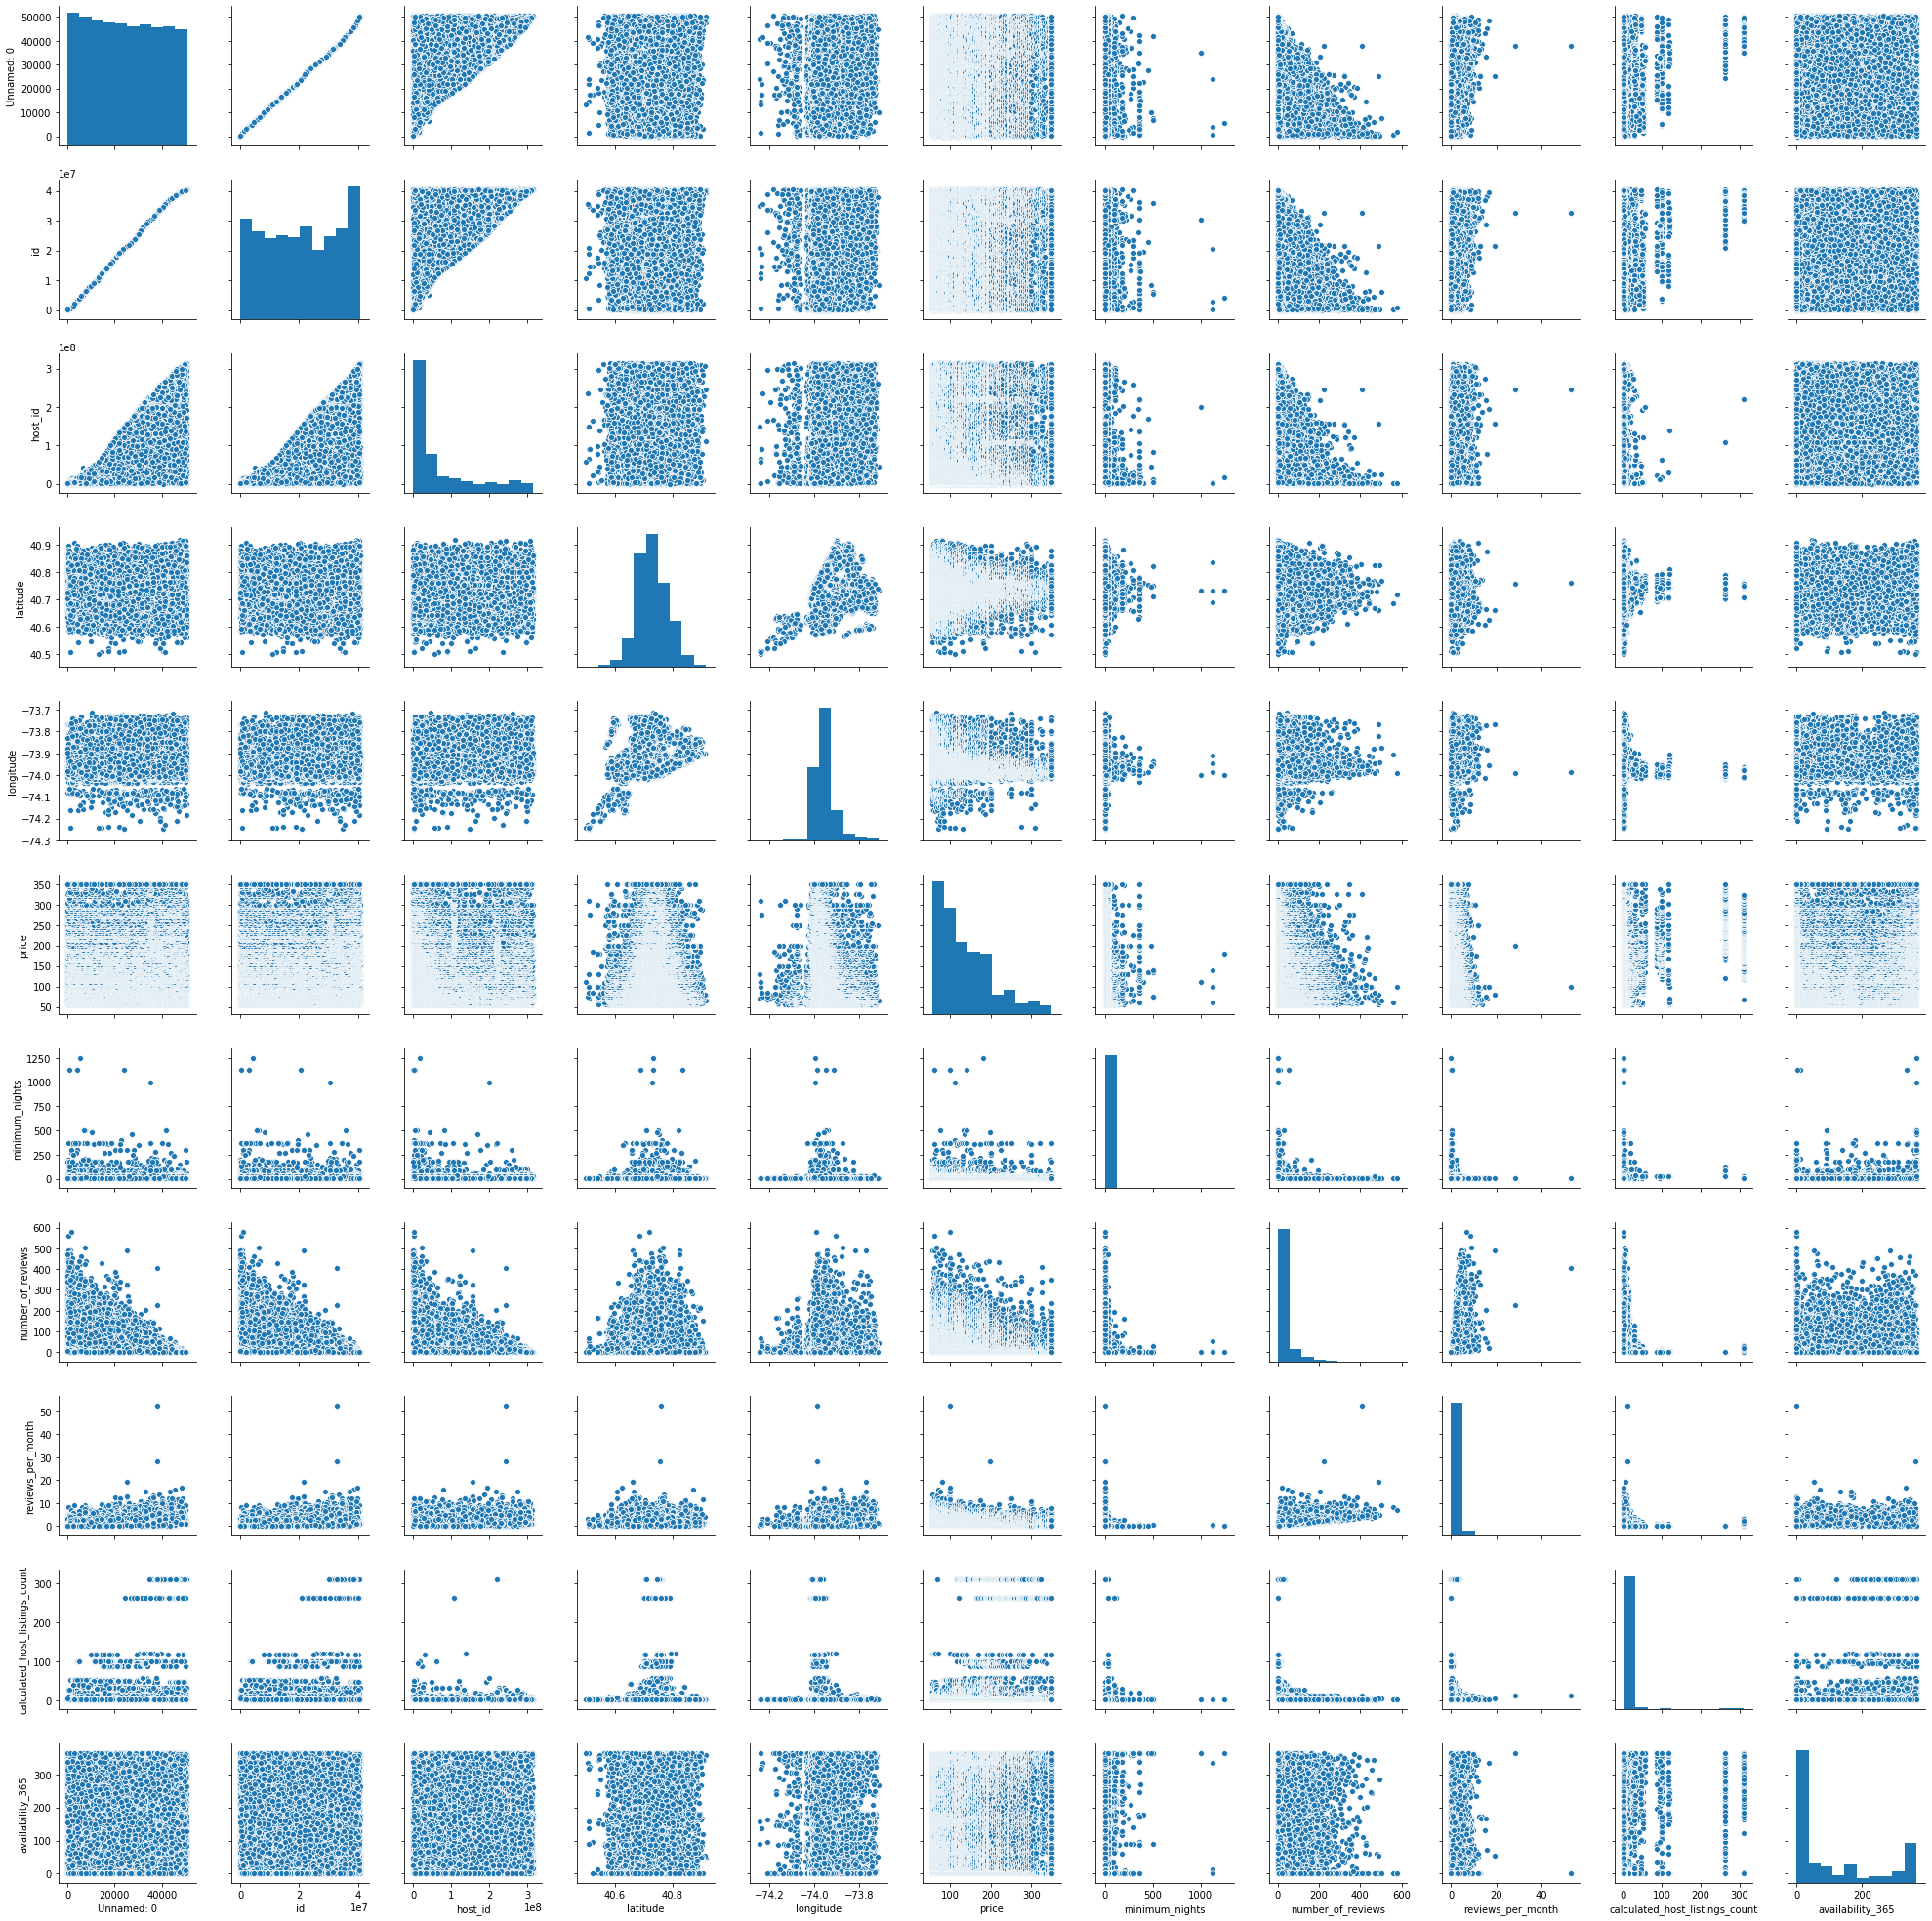

In [64]:
ax3 = sns.pairplot(abnb_df_90.iloc[round(abnb_nrows*.1):round(abnb_nrows*.9)])
ax3.savefig('price_corr90_pair_plot.png')